In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
with open('/content/sample_data/One.txt') as mytext:
  words_one = mytext.read().lower().split()
  uni_words_one = set(words_one)

In [19]:
with open('/content/sample_data/Two.txt') as mytext:
  words_two = mytext.read().lower().split()
  uni_words_two = set(words_two)

In [21]:
all_uni_words = set()
all_uni_words.update(uni_words_one)
all_uni_words.update(uni_words_two)

In [22]:
all_uni_words

{'a',
 'about',
 'animals',
 'are',
 'canine',
 'catching',
 'dogs',
 'fun',
 'furry',
 'is',
 'our',
 'pets',
 'popular',
 'sport',
 'story',
 'surfing',
 'this',
 'water',
 'waves'}

In [24]:
full_vocab = dict()
i=0
for word in all_uni_words:
  full_vocab[word] = i
  i = i+1

In [25]:
full_vocab

{'animals': 0,
 'pets': 1,
 'is': 2,
 'story': 3,
 'catching': 4,
 'waves': 5,
 'a': 6,
 'are': 7,
 'our': 8,
 'this': 9,
 'surfing': 10,
 'dogs': 11,
 'about': 12,
 'popular': 13,
 'sport': 14,
 'fun': 15,
 'canine': 16,
 'water': 17,
 'furry': 18}

In [26]:
one_freq = [0]*len(full_vocab)
two_freq = [0]*len(full_vocab)
all_words = ['']*len(full_vocab)

In [29]:
all_words

['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

In [31]:
with open('/content/sample_data/One.txt') as f:
  one_text = f.read().lower().split()

In [33]:
for word in one_text:
  word_ind = full_vocab[word]
  one_freq[word_ind] += 1

In [34]:
one_freq

[1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 2, 1, 0, 0, 0, 1, 0, 1]

In [35]:
with open('/content/sample_data/Two.txt') as f:
  two_text = f.read().lower().split()

In [36]:
for word in two_text:
  word_ind = full_vocab[word]
  two_freq[word_ind] += 1

In [37]:
two_freq

[0, 0, 3, 1, 1, 1, 1, 0, 0, 1, 2, 0, 1, 1, 1, 1, 0, 1, 0]

In [38]:
for word in full_vocab:
  word_ind = full_vocab[word]
  all_words[word_ind] = word

In [39]:
all_words

['animals',
 'pets',
 'is',
 'story',
 'catching',
 'waves',
 'a',
 'are',
 'our',
 'this',
 'surfing',
 'dogs',
 'about',
 'popular',
 'sport',
 'fun',
 'canine',
 'water',
 'furry']

In [41]:
bow = pd.DataFrame(data=[one_freq,two_freq],columns=all_words)

In [42]:
bow

,animals,pets,is,story,catching,waves,a,are,our,this,surfing,dogs,about,popular,sport,fun,canine,water,furry
0,1,1,1,1,0,0,1,1,1,1,0,2,1,0,0,0,1,0,1
1,0,0,3,1,1,1,1,0,0,1,2,0,1,1,1,1,0,1,0


In [43]:
text = ['This is a line','This is another line','Completely different line']

In [44]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer

In [50]:
cv = CountVectorizer(stop_words='english')

In [51]:
sparse_matrix = cv.fit_transform(text)

In [52]:
sparse_matrix.todense()

matrix([[0, 0, 1],
        [0, 0, 1],
        [1, 1, 1]])

In [53]:
cv.vocabulary_

{'line': 2, 'completely': 0, 'different': 1}

In [54]:
tfidf = TfidfTransformer()

In [55]:
tfidf.fit_transform(sparse_matrix).todense()

matrix([[0.        , 0.        , 1.        ],
        [0.        , 0.        , 1.        ],
        [0.65249088, 0.65249088, 0.38537163]])

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [57]:
tv = TfidfVectorizer(stop_words='english')

In [58]:
tv.fit_transform(text).todense()

matrix([[0.        , 0.        , 1.        ],
        [0.        , 0.        , 1.        ],
        [0.65249088, 0.65249088, 0.38537163]])

In [59]:
df = pd.read_csv('/content/sample_data/airline_tweets.csv')

In [60]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


<Axes: xlabel='airline_sentiment', ylabel='count'>

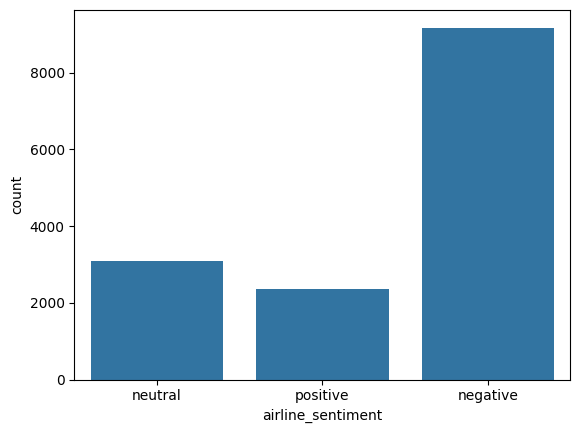

In [61]:
sns.countplot(x='airline_sentiment',data=df)

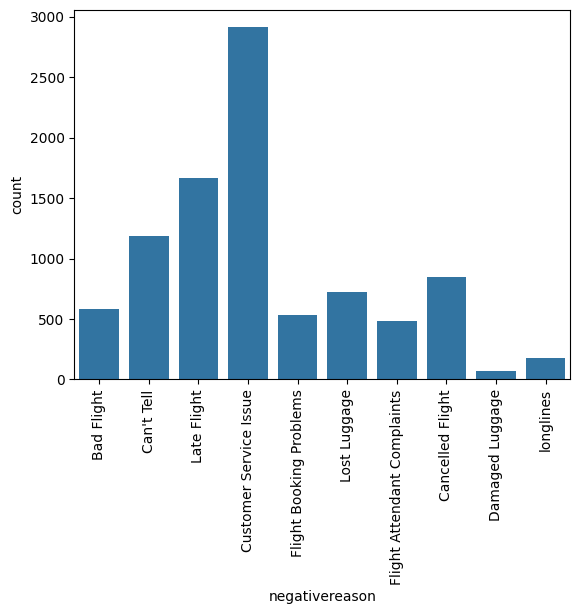

In [64]:
sns.countplot(data=df, x='negativereason')
plt.xticks(rotation=90);

<Axes: xlabel='airline', ylabel='count'>

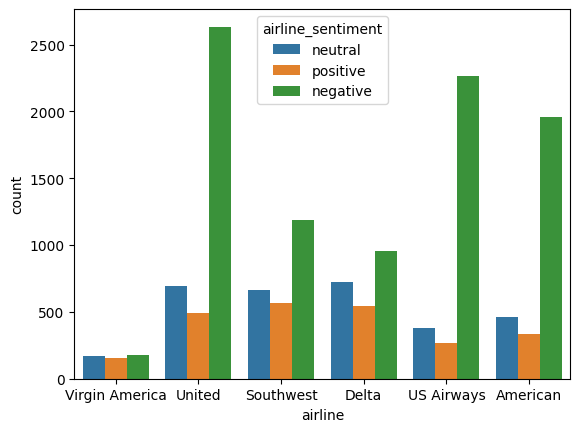

In [66]:
sns.countplot(x='airline',hue='airline_sentiment',data=df)

In [69]:
data = df[['airline_sentiment','text']]

In [70]:
X = data['text']
y = data['airline_sentiment']

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [76]:
TV = TfidfVectorizer(stop_words='english')

In [77]:
TV.fit(X_train)

TfidfVectorizer(stop_words='english')

In [79]:
X_train_tfidf = TV.transform(X_train)

In [80]:
X_test_tfidf = TV.transform(X_test)

In [81]:
from sklearn.naive_bayes import MultinomialNB

In [82]:
nb = MultinomialNB()
nb.fit(X_train_tfidf,y_train)

MultinomialNB()

In [85]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_tfidf,y_train)

LogisticRegression(max_iter=1000)

In [87]:
from sklearn.svm import SVC, LinearSVC
svc = SVC()
svc.fit(X_train_tfidf,y_train)

SVC()

In [88]:
linear_svc = LinearSVC()
linear_svc.fit(X_train_tfidf,y_train)

LinearSVC()

In [89]:
from sklearn.metrics import confusion_matrix, classification_report

In [90]:
def report(model):
  pred = model.predict(X_test_tfidf)
  print(confusion_matrix(y_test,pred))
  print(classification_report(y_test,pred))

In [91]:
report(nb)

[[883   6   0]
 [264  48   5]
 [208  14  36]]
              precision    recall  f1-score   support

    negative       0.65      0.99      0.79       889
     neutral       0.71      0.15      0.25       317
    positive       0.88      0.14      0.24       258

    accuracy                           0.66      1464
   macro avg       0.75      0.43      0.43      1464
weighted avg       0.70      0.66      0.57      1464



In [92]:
report(log_model)

[[832  47  10]
 [151 145  21]
 [ 65  44 149]]
              precision    recall  f1-score   support

    negative       0.79      0.94      0.86       889
     neutral       0.61      0.46      0.52       317
    positive       0.83      0.58      0.68       258

    accuracy                           0.77      1464
   macro avg       0.75      0.66      0.69      1464
weighted avg       0.76      0.77      0.76      1464



In [94]:
report(svc)

[[845  33  11]
 [170 124  23]
 [ 74  36 148]]
              precision    recall  f1-score   support

    negative       0.78      0.95      0.85       889
     neutral       0.64      0.39      0.49       317
    positive       0.81      0.57      0.67       258

    accuracy                           0.76      1464
   macro avg       0.74      0.64      0.67      1464
weighted avg       0.75      0.76      0.74      1464



In [95]:
report(linear_svc)

[[800  71  18]
 [119 166  32]
 [ 48  45 165]]
              precision    recall  f1-score   support

    negative       0.83      0.90      0.86       889
     neutral       0.59      0.52      0.55       317
    positive       0.77      0.64      0.70       258

    accuracy                           0.77      1464
   macro avg       0.73      0.69      0.70      1464
weighted avg       0.77      0.77      0.77      1464



In [98]:
from sklearn.pipeline import Pipeline

In [99]:
pipe = Pipeline([('tfidf',TfidfVectorizer()),
                ('svc',LinearSVC())])

In [100]:
pipe.fit(X,y)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [101]:
pipe.predict(['I love this airline'])

array(['positive'], dtype=object)